# DAV 6150 Module 5 Assignment
Group Members: Gege Li, Zhihong Zhang, Zhijing Zhang

## Introduction

The module is aiming to develop insights and analysis of a data set which has multiple binary observation. As the fifth module of the class, we need to build different metrics based on dataset and compare it with scikit learn built-in function. The general method we plan to do is to do a exploratory data analysis to see relationship between scored class and scored probability. Then we built functions and make plots. Finally we check our answers with built-in functions. 

## Data to be Used ##
The initial data set that was used for this research comes from the Canvas. The data set is a csv format file which can be easily loaded into Python by utilizing the pandas package.  The data points  180 labeled binary observations , and it is used to generate the observable pattern and visualizations. 

### Load and read the data set.

In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#reads data from the original source, since first row is column name,also add header. 
health = pd.read_csv("https://raw.githubusercontent.com/steinszzh/DAV6150/master/m5hw/M5_Data.csv")
#health = pd.read_csv("https://raw.githubusercontent.com/gegeli638/DAV-6150/master/M5_Data.csv")

# data set check - make sure data was read in as expected
health.head() 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491


### Data preparation:
The first thing to do is to check the null value and if there exist null value, replace or drop missing data. 

In [ ]:
# how many observations are contained within the example data set?
len(health)

181

In [ ]:
#check null value
health.isnull().sum()

pregnant              0
glucose               0
diastolic             0
skinfold              0
insulin               0
bmi                   0
pedigree              0
age                   0
class                 0
scored.class          0
scored.probability    0
dtype: int64

Based on these results, there is no null values, and null value check passed.

We will focus on these three attributes:
-  class: the actual classification for the observation
 
-  scored.class: the predicted classification for the observation (can only be ‘0’or ‘1’; identified by comparing the classification model’s probability score (i.e., the likelihood that the correct classification for an observation is a ‘1’) for the observation against a 0.50 threshold))
  
-  scored.probability: the classification models probability score (i.s., the likelihood that the correct classification for an observation is a ‘1’)for the observation

In [2]:
# reorganize the dataframe
df = health.iloc[:,[8,9,10]].copy() 
df.head()

,class,scored.class,scored.probability
0,0,0,0.328452
1,0,0,0.273190
2,1,0,0.109660
3,0,0,0.055998
4,0,0,0.100491


### Calculate the contents of a confusion matrix for the data. 
By using  __crosstab()__ function and check the __value_counts()__.


In [ ]:
#get confusion matrix
confusion_matrix1 = pd.crosstab(df['class'], df['scored.class'], rownames=['Actual'],colnames=['Predicted'])
confusion_matrix1

Predicted,0,1
Actual,,
0,119,5
1,30,27


In [ ]:
confusion_matrix1.size

4

In [ ]:
#get normallized confusion matrix
confusion_matrix2 = pd.crosstab(df['class'], df['scored.class'], rownames=['Actual'],colnames=['Predicted'],normalize=1)
confusion_matrix2

Predicted,0,1
Actual,,
0,0.798658,0.15625
1,0.201342,0.84375


Now we have the confusion matrix. Then we need to examine the output.

In [ ]:
#counts of actual value 
df['class'].value_counts()

0    124
1     57
Name: class, dtype: int64

In [ ]:
#counts of predict value 
df['scored.class'].value_counts(sort=True)

0    149
1     32
Name: scored.class, dtype: int64

In [ ]:
df['scored.probability'].value_counts(sort=True, bins=10)

(0.0213, 0.116]    44
(0.116, 0.208]     39
(0.208, 0.3]       24
(0.3, 0.392]       21
(0.392, 0.485]     17
(0.485, 0.577]      9
(0.669, 0.762]      8
(0.577, 0.669]      8
(0.854, 0.946]      6
(0.762, 0.854]      5
Name: scored.probability, dtype: int64

The total actual of 0 is 124, the total actual of 1 is 57. The total predicted of 0 is 149, the total predicted of 1 is 32.

After observing the __value_counts()__, the __crosstab()__ outputs sum to the respective __value_counts()__ figures.



### Extract the individual confusion matrix values (i.e., TP, FP, TN, FN)

In [3]:
#the actual and predicted values 
actual_a = df['class']
predicted_a=  df['scored.class']

In [4]:
#true positive
TP = np.sum(np.logical_and(predicted_a == 1, actual_a == 1))

#true negative
TN = np.sum(np.logical_and(predicted_a == 0, actual_a == 0))

#false positive
FP = np.sum(np.logical_and(predicted_a  == 1, actual_a == 0))
 
#false negative
FN = np.sum(np.logical_and(predicted_a  == 0, actual_a == 1))

In [ ]:
#check
print(TP, TN, FP, FN)

27 119 5 30


### Write Python functions that will return:
- the accuracy metric, 
- the precision metric, 
- the sensitivity metric, 
- the specificity metric, 
- the F1 Score metric.

Then apply them to the provided data set.

__Accuracy metric__

In [ ]:
# Accuracy
# (TP + TN) / (TP + TN + FP + FN) 


def cal_accuracy(actual_type, predict_type):
  TP =  np.sum(np.logical_and(predict_type == 1, actual_type == 1))
  TN = np.sum(np.logical_and(predict_type == 0, actual_type == 0))
  FP = np.sum(np.logical_and(predict_type  == 1, actual_type == 0))
  FN = np.sum(np.logical_and(predict_type  == 0,actual_type== 1))
  return (TP + TN) / (TP + TN + FP + FN)

#print the result of provided data set
print("accuracy:", cal_accuracy(actual_a, predicted_a))

accuracy: 0.8066298342541437


__Precision metric__

In [ ]:
# Precision
#TP / (TP + FP)


# Precision = TP / TP + FP
def cal_precision(actual_type, predict_type):
  TP =  np.sum(np.logical_and(predict_type == 1, actual_type == 1))
  FP = np.sum(np.logical_and(predict_type  == 1, actual_type == 0))
  return TP / (TP + FP)

#print the result of provided data set
print("precision:", cal_precision(actual_a, predicted_a))

precision: 0.84375


__Sensitivity  metric__ 

In [ ]:
# Sensitivity
# TP / TP + FN


def cal_sensitivity(actual_type, predict_type):
  TP =  np.sum(np.logical_and(predict_type == 1, actual_type == 1))
  FN = np.sum(np.logical_and(predict_type  == 0,actual_type== 1))
  return TP / (TP + FN)

#print the result of provided data set
print("sensitivity:", cal_sensitivity(actual_a, predicted_a))

sensitivity: 0.47368421052631576


__Specificity  metric__ 

In [ ]:
# Specificity
# TN / FP + TN

def cal_specificity(actual_type, predict_type):
  TN = np.sum(np.logical_and(predict_type == 0, actual_type == 0))
  FP = np.sum(np.logical_and(predict_type  == 1, actual_type == 0))
  return TN / (FP + TN)

#print the result of provided data set
print("specificity:", cal_specificity(actual_a, predicted_a))

specificity: 0.9596774193548387


__F1 Score metric__

In [ ]:
## F1 Score
# F1 Score = 2 * Precision * Recall / (Precision + Recall)


# Harmonic mean of (a, b) is 2 * (a * b) / (a + b)
def cal_f1(actual_type, predict_type):
  return 2 * (cal_precision(actual_type, predict_type) * cal_sensitivity(actual_type, predict_type)) / (cal_precision(actual_type, predict_type) + cal_sensitivity(actual_type, predict_type))

#print the result of provided data set
print("F1 Score:", cal_f1(actual_a, predicted_a))

F1 Score: 0.6067415730337079


In summary, the data we got from own functions of the metrics can be shown as follows:
- sensitivity: 0.47368421052631576
- accuracy: 0.8066298342541437
- precision: 0.84375
- specificity : 0.9596774193548387
- F1 value is 0.6067

### Result Evaluation 

Now, we use built-in function to compare the result.


classification_report can quickly gives a general overview of these metrics

In [ ]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']
print(classification_report(actual_a,predicted_a,target_names= target_names))
#,labels=labels,digits=3

              precision    recall  f1-score   support

     class 0       0.80      0.96      0.87       124
     class 1       0.84      0.47      0.61        57

    accuracy                           0.81       181
   macro avg       0.82      0.72      0.74       181
weighted avg       0.81      0.81      0.79       181



For each individual metric, we can also run correlated score functions to get the results.

In [ ]:
# set up built in function
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
 
#print result 
print("sklearn accuracy:", accuracy_score(actual_a, predicted_a))
print("sklearn precision:", precision_score(actual_a, predicted_a))
print("sklearn F1 Score:", f1_score(actual_a, predicted_a))
print("sklearn Sensitivity:", recall_score(actual_a, predicted_a))

sklearn accuracy: 0.8066298342541437
sklearn precision: 0.84375
sklearn F1 Score: 0.6067415730337079
sklearn Sensitivity: 0.47368421052631576


In [ ]:
#if only used built in function for specificity calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
actual=df['class']
predict=df['scored.class']
#use 
tn, fp, fn, tp = confusion_matrix(actual, predict).ravel()

specificity = tn / (tn+fp)
print("specificity:", specificity)

specificity: 0.9596774193548387


From this results we can find that the output of the build-in functions are very similar to our functions. (It is almost identical)

 ### Write a Python function -- plot a ROC curve and calculate AUC

In [6]:
# TPR = TP/ (TP + FN)
# FPR = FP / (FP+TN)
# thresholds = max(y_score) + 1

def cal_ROC(actual_type, predict_type):

  TPR = []
  FPR = []
  P= sum(actual_a)
  N= 181- P
  for i in interval:
    TPR= TP/ P
    FPR= FP / N

  return

Our team had some trouble on building the functions, and here are ideas of construct this function.

Pseudo code or process for ROC computing

1. set up empty lists for true positive rate and false positive rate. 
2. Based on exported value from confusion matrix to get number of positive or negative values in the actual observation. 

3. iterate multiple times to append value to these two empty lists of true positive rate and false positive rate. false positive rate is computed by FP / (FP+TN) in this case. it is FP/N
similarly, True positive rate is TP/P.

4. technically ROC plot is plotting FPR vs TPR. Then use plot function such as matplot or sns to do this part.

AUC computing is easy, simply apply trapezoidal rule on fpr and tpr. 


In [ ]:
# using  numpy's trapezoidal  rule to get the area
auc = np.trapz(TPR,FPR)

Ideally we can use this strategy to get our plot and area, and unfortunately we have trouble on building the code especially on iterating part. 

### Result Evaluation 
**compare the output**

In [ ]:
#plot ROC curve using builtin function

# y is actual, then predict value
fpr, tpr, thresholds = metrics.roc_curve(actual_a,predicted_a )
#get area value
metrics.auc(fpr, tpr)

0.7166808149405772

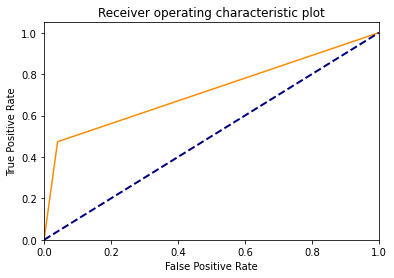

In [ ]:
#alternative

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
#define line
lw=2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(actual_a,predicted_a)
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure()
plt.plot(fpr[1], tpr[1], color='darkorange')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic plot')
plt.show()

 Since this ROC plot is based on Scored class attributes directly, and it technically lose some information, now we switched to use score probability for calculating this value. 

In [ ]:
#new predict value
predict_in_roc = df['scored.probability'] 

actual_in_roc = actual_a

Then we compute AUC and make plot for ROC again.

In [ ]:
#plot ROC curve using builtin function
from sklearn import datasets, metrics, model_selection, svm

# y is actual, then predict value
fpr, tpr, thresholds = metrics.roc_curve( actual_in_roc,predict_in_roc)
#get area value
metrics.auc(fpr, tpr)

0.8503112620260327

New area under the curve is 0.85

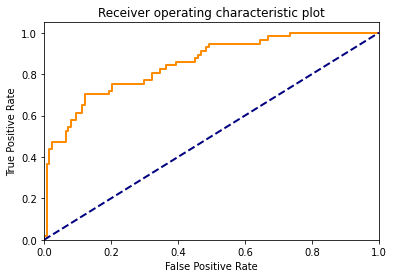

In [ ]:
#use sckit learn to 

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(actual_in_roc,predict_in_roc)
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',lw=lw, label='ROC curve' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic plot')
plt.show()

As expected, now we have a large area under the curve along with more responses during this interval.

I think this plot better explains the model for its completeness. By definition, this one has a higher AUC value 0.85 (compared with previous 0.716). This model has a better performance.

## Conclusion

Based on results we got, our functions have very similar results with sklearn package, although we have some trouble on setting up to compute ROC by own function, we provide some of our ideas.

## References


1. https://www.displayr.com/what-is-a-crosstab/
2. https://blog.floydhub.com/a-pirates-guide-to-accuracy-precision-recall-and-other-scores/
3. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html